# Lecture 22: Pandas, Matplotlib and Numpy

__Reading Material:__
- [Pandas Tutorial](https://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- Pandas Basics Cheat Sheet (on CCLE)

## Pandas

We use the modules pandas and matplotlib to import a dataset and create a nice visualization. Pandas assumes that your data file has rows separated by newlines, and columns separated by an expression that you specify. It also assumes that the first row contains the names of your columns. We start with the dataset on LSD and math scores1 from
[this page](http://stat.ufl.edu/~winner/datasets.html).

In [4]:
f = open('lsd.txt').read()
print f

drug	math
1.17	78.93
2.97	58.20
3.26	67.47
4.69	37.47
5.83	45.65
6.00	32.92
6.41	29.97



We first import the data in a .txt file into pandas as follows:

In [5]:
import pandas as pd
lsd = pd.read_table('lsd.txt','\t')
print lsd

   drug   math
0  1.17  78.93
1  2.97  58.20
2  3.26  67.47
3  4.69  37.47
4  5.83  45.65
5  6.00  32.92
6  6.41  29.97


/Users/vincentl/PycharmProjects/venv/new interpreter/python 2.7 interpreter/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
lsd['math']

0    78.93
1    58.20
2    67.47
3    37.47
4    45.65
5    32.92
6    29.97
Name: math, dtype: float64

Pandas lets us call the separate columns by their name using commands __lsd['math']__ and __lsd['drug']__. 

We can use these directly as lists to input into pyplot and create a scatter plot.

In [7]:
import matplotlib.pyplot as plt 
plt.plot(lsd['drug'],lsd['math'],'o')
plt.axis([0, 7, 0, 100])
plt.ylabel('Math Score')
plt.xlabel('LSD Tissue Concentration') 
plt.title('Math Scores and Drug Concentrations') 
plt.show()

<Figure size 640x480 with 1 Axes>

We now do the same for a data set on "Comparison of 6 Lengths of Chop Sticks of Feeding Efficiency" on the [dataset page](http://stat.ufl.edu/~winner/datasets.html) and use a bar plot to visualize the data set.

In [8]:
cs = pd.read_table('chopstick2_rcb.dat','\s+')
print cs

       eff  type  subject
0    19.55     1        1
1    27.24     1        2
2    28.76     1        3
3    31.19     1        4
4    21.91     1        5
5    27.62     1        6
6    29.46     1        7
7    26.35     1        8
8    26.69     1        9
9    30.22     1       10
10   27.81     1       11
11   23.46     1       12
12   23.64     1       13
13   27.85     1       14
14   20.62     1       15
15   25.35     1       16
16   28.00     1       17
17   23.49     1       18
18   27.77     1       19
19   18.48     1       20
20   23.01     1       21
21   22.66     1       22
22   23.24     1       23
23   22.82     1       24
24   17.94     1       25
25   26.67     1       26
26   28.98     1       27
27   21.48     1       28
28   14.47     1       29
29   28.29     1       30
..     ...   ...      ...
156  26.18     6        2
157  25.93     6        3
158  28.61     6        4
159  20.54     6        5
160  26.44     6        6
161  29.36     6        7
162  19.77  

/Users/vincentl/PycharmProjects/venv/new interpreter/python 2.7 interpreter/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


/Users/vincentl/PycharmProjects/venv/new interpreter/python 2.7 interpreter/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until


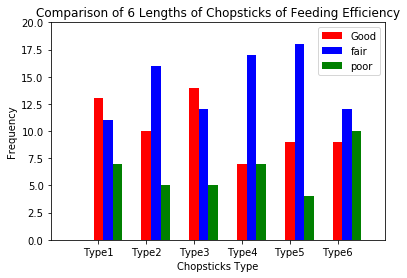

In [9]:
import numpy as np
cs = pd.read_table('chopstick2_rcb.dat','\s+')
type1 = cs['type']==1   #mask
type2 = cs['type']==2
type3 = cs['type']==3
type4 = cs['type']==4
type5 = cs['type']==5
type6 = cs['type']==6
good = cs['eff'] >= 27
fair = (cs['eff']>= 22) & (cs['eff'] < 27)
poor = cs['eff']<22 
barwidth=.2
plt.axis([-1, 6, 0, 20])
plt.ylabel('Frequency')
plt.xlabel('Chopsticks Type')
plt.title('Comparison of 6 Lengths of Chopsticks of Feeding Efficiency') 
plt.xticks(np.arange(6)+1/2,['Type1','Type2','Type3','Type4','Type5','Type6']) 

plt.bar(np.arange(6),[len(cs[type1 & good]),
                      len(cs[type2 & good]),
                      len(cs[type3 & good]), 
                      len(cs[type4 & good]), 
                      len(cs[type5 & good]), 
                      len(cs[type6 & good])], 
        barwidth, color='r', label='Good')
plt.bar(np.arange(6)+barwidth,[len(cs[type1 & fair]),
                               len(cs[type2 & fair]),
                               len(cs[type3 & fair]), 
                               len(cs[type4 & fair]), 
                               len(cs[type5 & fair]), 
                               len(cs[type6 & fair])], 
        barwidth, color='b', label='fair')
plt.bar(np.arange(6)+2*barwidth,[len(cs[type1 & poor]),
                                 len(cs[type2 & poor]),
                                 len(cs[type3 & poor]), 
                                 len(cs[type4 & poor]), 
                                 len(cs[type5 & poor]), 
                                 len(cs[type6 & poor])], 
        barwidth, color='g', label='poor')

plt.legend()
plt.show()

## Networks

Networks are sets of nodes that may pairwise be connected by links. Links may be directed or weighted, and the network might contain other information such as categories of nodes or links. We can store a network in a 2-dimensional array (a list of lists) such that the value at index i, j indicates the presence of a link. 

For example, here is a network with nodes 0, 1, 2, such that node 1 is connected to node 0 and 2:

In [10]:
N=[[0,1,0],[1,0,1],[0,1,0]]
print N



[[0, 1, 0], [1, 0, 1], [0, 1, 0]]


Let's write a function that takes any network in this form, and plots it using __matplotlib__. It creates the x and y coordinates by placing the nodes equally spaced around a circle:

In [11]:
import numpy as np
def network_plot_circle(N):
    n=len(N)
    x=[np.cos(2*np.pi*i/n) for i in range(n)]
    y=[np.sin(2*np.pi*i/n) for i in range(n)]
    for i in range(n):
        for j in range(i):
               if N[i][j]==1:
                    plt.plot([x[i],x[j]],[y[i],y[j]],'b')
    plt.plot(x,y,'ro')
    for i,txt in enumerate(range(n)):
        plt.annotate(txt, (x[i],y[i]))
    plt.show()

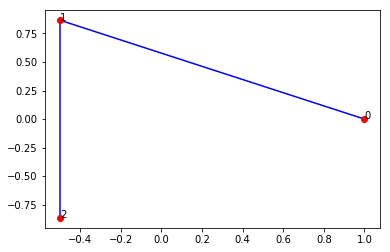

In [12]:
network_plot_circle(N)

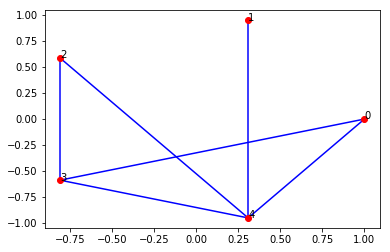

In [13]:
N2=np.array([[1,0,0,1,1],[0,1,1,1,1],[0,0,1,1,1],[1,0,1,1,1],[1,1,1,1,1]])
network_plot_circle(N2)

The example network is the Zachary Karate Club social network. This is a well-known social network of friendships between 34 members of a karate club at a US university in the 1970s.

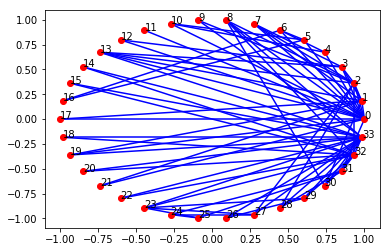

In [14]:
karate = open("karate_edgeList.txt").read()
pairs = [s.split('\t') for s in karate.splitlines()]
pairs = [[int(i) for i in j]for j in pairs]
n = max(max(j for j in pairs))
adjMatrix = [[0]*n for _ in range(n)]
for p in pairs:
    adjMatrix[p[0]-1][p[1]-1]=1
    adjMatrix[p[1]-1][p[0]-1]=1

network_plot_circle(adjMatrix)

### Exercises

- Create visualizations for several other datasets from the toy dataset page.

- Adapt the network plotting code so that it plots the nodes at uniform randomly chosen coordinates.

- Adapt the network plotting code so that it plots edges of two different colors, which the user can indicate by recording edges as 1s or 2s in their data.

- Adapt the network plotting code so that it takes as input a network and list, which is a subset of the nodes. It plots those nodes in a different color from the rest, and plots them next to each other on the circle.

- Adapt the network plotting code so that it plots edges of different thickness, depending on their value in the data.